In [9]:
import pyxdf
import mne
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import TwoSlopeNorm

from mne.io import concatenate_raws, read_raw_edf
from mne.stats import permutation_cluster_1samp_test as pcluster_test

# **Part 1**: Without artifact removal

## Preprocessing

In [24]:
# -- |Data details| --
participant_id = '00'
initial_session = 1
n_session = 4

# -- |Local parameters|--
epochs_list = [] 

for i in range(initial_session,initial_session+n_session):
    # -- |File import| --
    streams, header = pyxdf.load_xdf(f"Data/sub-P0{participant_id}/ses-S00{str(i)}/eeg/sub-P0{participant_id}_ses-S00{str(i)}_task-Default_run-001_eeg.xdf") #Example Data from Lab Recoder
    
    # -- |EEG data| --
    EEG = [data for data in streams if data['info']['type'] == ['EEG']][0] #From Steam variable this query is EEG data
    raw_data = (EEG["time_series"].T)/1000000 # Convert microvoltage to voltage

    # -- |Channels Information| --
    channels = ['Fz','C3','Cz','C4','Pz','PO7','PO8','EOG'] #Set your target EEG channel name
    info = mne.create_info(
        ch_names= channels,
        ch_types= ['eeg']*(len(channels) - 1) + ['eog'],
        sfreq= 250,  #OpenBCI Frequency acquistion
        verbose=False
    )

    # -- |Create MNE rawarray| --
    raw_mne = mne.io.RawArray(raw_data, info, verbose=False)

    # -- |Common Average Reference| --
    mne_car = raw_mne.copy().set_eeg_reference('average', verbose=False)

    # -- |Bandpass filter| --
    mne_alpha = mne_car.filter(l_freq=8.0, h_freq=13.0, fir_design='firwin', verbose=False)

    # -- |Events|--
    Events = [data for data in streams if data['info']['type'] == ['Markers']][0]

    event_index = Events["time_series"].T[0] #Get all event marker of experiment 
    event_timestamp = (((Events["time_stamps"].T) - EEG["time_stamps"][0]) *250).astype('int')

    events = np.column_stack((np.array(event_timestamp, dtype = int),
                        np.zeros(len(event_timestamp), dtype = int),
                        np.array(event_index, dtype = int)))

    events_id = { # Set up your event name
        'right': 0,
        'left': 1
    }

    # -- |Epoch Segmentation| --
    epochs = mne.Epochs(mne_alpha, events, 
        tmin= -0.5,     # init timestamp of epoch (0 means trigger timestamp same as event start)
        tmax= 3.0,      # final timestamp (10 means set epoch duration 10 second)
        event_id =events_id,
        preload = True,
        verbose=False,
        picks = ['C3','Cz','C4','PO7','Pz','PO8']
    )

    epochs_list.append(epochs)

epochs = mne.concatenate_epochs(epochs_list)
epochs.set_montage(mne.channels.make_standard_montage('standard_1020'))

Not setting metadata
123 matching events found
Applying baseline correction (mode: mean)


Number of events,123
Events,left: 60right: 63
Time range,-0.500 – 3.000 s
Baseline,-0.500 – 0.000 s


## ERD Visualization

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.1s remaining:    0.0s


Applying baseline correction (mode: percent)
Using a threshold of 1.669804
stat_fun(H1): min=-25.91505971548334 max=8.944813997585875
Running initial clustering …
Found 4 clusters


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.7s finished
C:\Users\AbsoluteZeno\AppData\Local\Temp\ipykernel_33036\757762342.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.time_frequency.tfr.EpochsTFR'>.tmax (2.996 s)
  tfr.crop(tmin, tmax).apply_baseline(baseline, mode="percent")


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 2 clusters to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Using a threshold of -1.669804
stat_fun(H1): min=-25.91505971548334 max=8.944813997585875
Running initial clustering …
Found 27 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 3 clusters to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
No baseline correction applied
Using a threshold of 1.669804
stat_fun(H1): min=-15.583298969724405 max=8.846806985421223
Running initial clustering …
Found 24 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Using a threshold of -1.669804
stat_fun(H1): min=-15.583298969724405 max=8.846806985421223
Running initial clustering …
Found 45 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
No baseline correction applied
Using a threshold of 1.669804
stat_fun(H1): min=-16.945787301976633 max=9.908720108462969
Running initial clustering …
Found 24 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Using a threshold of -1.669804
stat_fun(H1): min=-16.945787301976633 max=9.908720108462969
Running initial clustering …
Found 41 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 3 clusters to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
No baseline correction applied


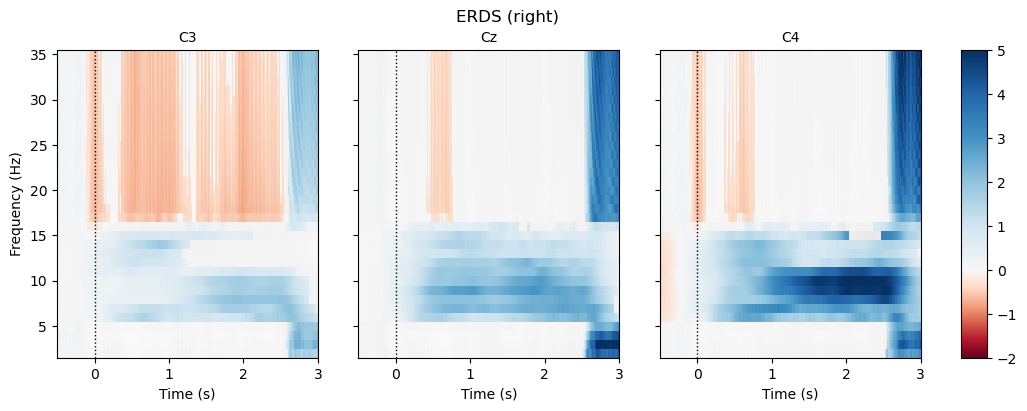

Using a threshold of 1.671093
stat_fun(H1): min=-14.8223705248819 max=11.570194297664122
Running initial clustering …
Found 20 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 2 clusters to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Using a threshold of -1.671093
stat_fun(H1): min=-14.8223705248819 max=11.570194297664122
Running initial clustering …
Found 27 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 3 clusters to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
No baseline correction applied
Using a threshold of 1.671093
stat_fun(H1): min=-14.277729892436925 max=10.660359629291
Running initial clustering …
Found 31 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Using a threshold of -1.671093
stat_fun(H1): min=-14.277729892436925 max=10.660359629291
Running initial clustering …
Found 42 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
No baseline correction applied
Using a threshold of 1.671093
stat_fun(H1): min=-13.766037849401004 max=12.38245081641449
Running initial clustering …
Found 33 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Using a threshold of -1.671093
stat_fun(H1): min=-13.766037849401004 max=12.38245081641449
Running initial clustering …
Found 25 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
No baseline correction applied


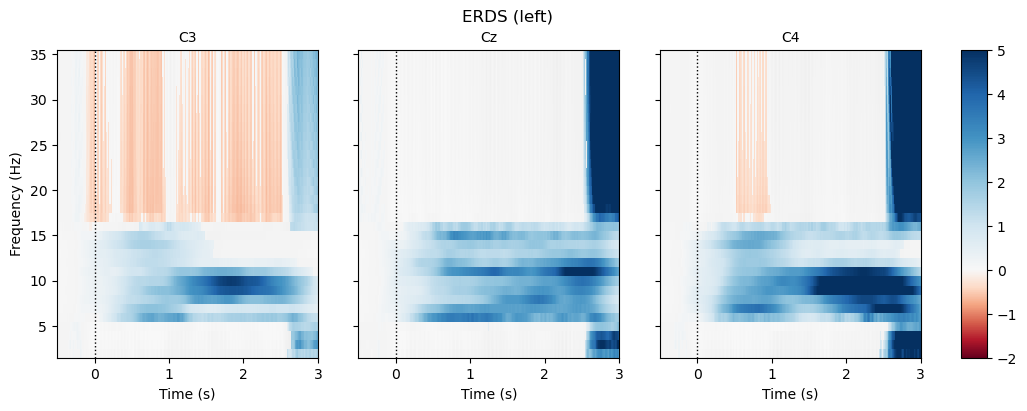

In [25]:
tmin, tmax = -0.5, 3
events_id = { # Set up your event name
        'right': 0,
        'left': 1
    }
freqs = np.arange(2, 36)  # frequencies from 8-12Hz
vmin, vmax = -2, 5  # set min and max ERDS values in plot
baseline = (-0.5, 0)  # baseline interval (in s)
cnorm = TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)  # min, center & max ERDS

kwargs = dict(
    n_permutations=100, step_down_p=0.05, seed=1, buffer_size=None, out_type="mask"
)  # for cluster test

tfr = epochs.compute_tfr(
    method="multitaper",
    freqs=freqs,
    n_cycles=freqs,
    use_fft=True,
    return_itc=False,
    average=False,
    decim=2,
)
tfr.crop(tmin, tmax).apply_baseline(baseline, mode="percent")

for event in events_id:
    # select desired epochs for visualization
    tfr_ev = tfr[event]
    fig, axes = plt.subplots(
        1, 4, figsize=(12, 4), gridspec_kw={"width_ratios": [10, 10, 10, 1]}
    )
    for ch, ax in enumerate(axes[:-1]):  # for each channel
        # positive clusters
        _, c1, p1, _ = pcluster_test(tfr_ev.data[:, ch], tail=1, **kwargs)
        # negative clusters
        _, c2, p2, _ = pcluster_test(tfr_ev.data[:, ch], tail=-1, **kwargs)

        # note that we keep clusters with p <= 0.05 from the combined clusters
        # of two independent tests; in this example, we do not correct for
        # these two comparisons
        c = np.stack(c1 + c2, axis=2)  # combined clusters
        p = np.concatenate((p1, p2))  # combined p-values
        mask = c[..., p <= 0.05].any(axis=-1)

        # plot TFR (ERDS map with masking)
        tfr_ev.average().plot(
            [ch],
            cmap="RdBu",
            cnorm=cnorm,
            axes=ax,
            colorbar=False,
            show=False,
            mask=mask,
            mask_style="mask",
        )

        ax.set_title(epochs.ch_names[ch], fontsize=10)
        ax.axvline(0, linewidth=1, color="black", linestyle=":")  # event
        if ch != 0:
            ax.set_ylabel("")
            ax.set_yticklabels("")
    fig.colorbar(axes[0].images[-1], cax=axes[-1]).ax.set_yscale("linear")
    fig.suptitle(f"ERDS ({event})")
    plt.show()

Converting "condition" to "category"...
Converting "epoch" to "category"...
Converting "channel" to "category"...
Converting "ch_type" to "category"...


c:\Users\AbsoluteZeno\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\AbsoluteZeno\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\AbsoluteZeno\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
c:\Users\AbsoluteZeno\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option

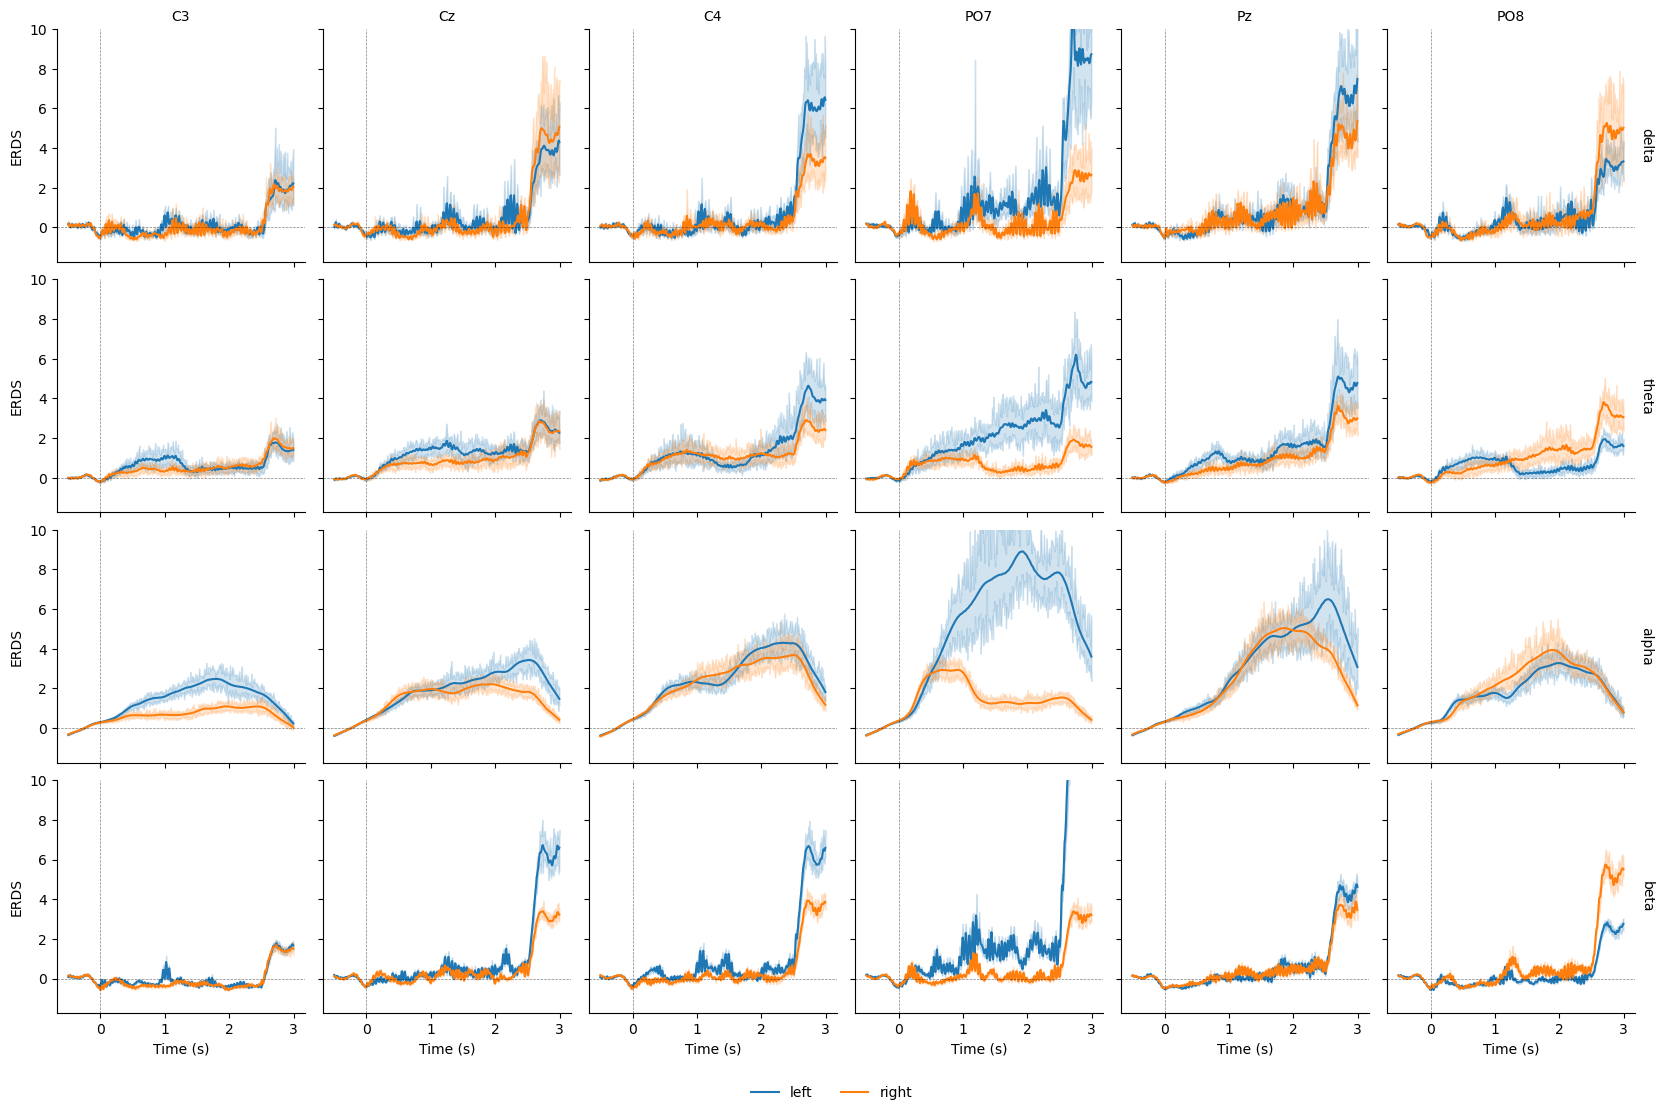

In [28]:
df = tfr.to_data_frame(time_format=None, long_format=True)

# Map to frequency bands:
freq_bounds = {"_": 0, "delta": 3, "theta": 7, "alpha": 13, "beta": 35, "gamma": 140}
df["band"] = pd.cut(
    df["freq"], list(freq_bounds.values()), labels=list(freq_bounds)[1:]
)

# Filter to retain only relevant frequency bands:
freq_bands_of_interest = ["delta", "theta", "alpha", "beta"]
df = df[df.band.isin(freq_bands_of_interest)]
df["band"] = df["band"].cat.remove_unused_categories()

# Order channels for plotting:
df["channel"] = df["channel"].cat.reorder_categories(("C3", "Cz", "C4","PO7","Pz","PO8"), ordered=True)

g = sns.FacetGrid(df, row="band", col="channel", margin_titles=True)
g.map(sns.lineplot, "time", "value", "condition", n_boot=10)
axline_kw = dict(color="black", linestyle="dashed", linewidth=0.5, alpha=0.5)
g.map(plt.axhline, y=0, **axline_kw)
g.map(plt.axvline, x=0, **axline_kw)
g.set(ylim=(None, 10))
g.set_axis_labels("Time (s)", "ERDS")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.add_legend(ncol=2, loc="lower center")
g.fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.08)

## Features Extraction

In [320]:
# Get EEG data and events
X = epochs.get_data(copy=False)
Y = epochs.events[:, -1]

print(f'EEG data shape: {X.shape}')
print(f'events shape  : {Y.shape}')

EEG data shape: (154, 6, 876)
events shape  : (154,)


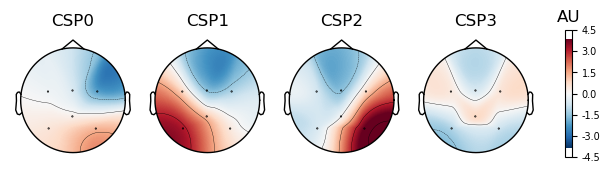

In [321]:
from mne.decoding import CSP
# Initilize CSP
csp = CSP(n_components = 4, norm_trace = False)

# Fit CSP to data 
csp.fit(X,Y)

# Visualize CSP patterns
csp.plot_patterns(epochs.info);

## Classification

In [322]:
from sklearn.model_selection import train_test_split
# Transform data into CSP space
X_transformed = csp.transform(X)

# Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_transformed, Y, test_size = 0.2, random_state = 42, stratify=Y)

print(f'Train set shape: {X_train.shape}')
print(f'Test set shape : {X_test.shape}')

Train set shape: (123, 4)
Test set shape : (31, 4)


In [323]:
from sklearn.svm import SVC 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

clf = Pipeline([('SVM', SVC(kernel='linear'))])  
clf.fit(X_train, Y_train)

y_pred = clf.predict(X_test)
accuracy_noArtifactRemoval = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy_noArtifactRemoval}")

report = classification_report(Y_test, y_pred, target_names=['right', 'left'])  # adjust target names accordingly
print(report)

Accuracy: 0.8064516129032258
              precision    recall  f1-score   support

       right       0.78      0.88      0.82        16
        left       0.85      0.73      0.79        15

    accuracy                           0.81        31
   macro avg       0.81      0.80      0.80        31
weighted avg       0.81      0.81      0.81        31



# **Part 2**: With artifact removal

In [345]:
n_iteration = 3

mne.set_log_level(verbose=False)

K = np.random.rand(4,7)/100    # Initialize hyperparameters

# -- |Channels Information| --
channels = ['Fz','C3','Cz','C4','Pz','PO7','PO8'] #Set your target EEG channel name
info = mne.create_info(
    ch_names= channels,
    ch_types= ['eeg']*len(channels),
    sfreq= 250,  #OpenBCI Frequency acquistion
    verbose=False
)

# -- |Events name| --
events_id = { # Set up your event name
    'right': 0,
    'left': 1
}

for j in range(n_iteration):
    accuracy = []
    for k in K: # Generation Iteration
        # -- |Reset Epochs for new hyperparameter| --
        epochs_list = [] 
        for i in range(initial_session,initial_session+n_session): # Offspring Iteration
            # -- |File import| --
            streams, header = pyxdf.load_xdf(f"Data/sub-P0{participant_id}/ses-S00{str(i)}/eeg/sub-P0{participant_id}_ses-S00{str(i)}_task-Default_run-001_eeg.xdf") #Example Data from Lab Recoder

            # -- |EEG data| --
            EEG = [data for data in streams if data['info']['type'] == ['EEG']][0] #From Steam variable this query is EEG data

            raw_data = ((EEG["time_series"].T)/1000000)[:-1,:] # Convert microvoltage to voltage
            EOG = ((EEG["time_series"].T)/1000000)[-1,:]

            # -- |Events|--
            Events = [data for data in streams if data['info']['type'] == ['Markers']][0]

            event_index = Events["time_series"].T[0] #Get all event marker of experiment 
            event_timestamp = (((Events["time_stamps"].T) - EEG["time_stamps"][0]) *250).astype('int')

            events = np.column_stack((np.array(event_timestamp, dtype = int),
                                np.zeros(len(event_timestamp), dtype = int),
                                np.array(event_index, dtype = int)))

            # -- |Artifact Removal| --
            raw_data -= np.diag(k)@np.tile(EOG,(7,1))

            # -- |Create MNE rawarray| --
            raw_mne = mne.io.RawArray(raw_data, info, verbose=False)

            # -- |Common Average Reference| --
            mne_car = raw_mne.copy().set_eeg_reference('average', verbose=False)

            # -- |Bandpass filter| --
            mne_alpha = mne_car.filter(l_freq=8.0, h_freq=13.0, fir_design='firwin', verbose=False)

            # -- |Epoch Segmentation| --
            epochs = mne.Epochs(mne_alpha, events, 
                tmin= -0.5,     # init timestamp of epoch (0 means trigger timestamp same as event start)
                tmax= 3.0,      # final timestamp (10 means set epoch duration 10 second)
                event_id =events_id,
                preload = True,
                verbose=False,
                picks = ['C3','Cz','C4','PO7','Pz','PO8']
            )

            epochs_list.append(epochs)

        # -- |Epoch Settings| --
        epochs = mne.concatenate_epochs(epochs_list)
        epochs.set_montage(mne.channels.make_standard_montage('standard_1020'))

        # -- |Initilize CSP| --
        csp = CSP(n_components = 4, norm_trace = False)

        # -- |Fit CSP to data| --
        csp.fit(X,Y)

        # -- |Transform data into CSP space| --
        X_transformed = csp.transform(X)

        # -- |Split data into training and test sets| --
        X_train, X_test, Y_train, Y_test = train_test_split(X_transformed, Y, test_size = 0.2, random_state = 42, stratify=Y)

        # -- |Classification| --
        clf = Pipeline([('SVM', SVC(kernel='linear'))])  
        clf.fit(X_train, Y_train)

        y_pred = clf.predict(X_test)
        accuracy.append(accuracy_score(Y_test, y_pred))
    
    # -- |Genetic Algorithm| --
    # Parent selection
    parents_ind = np.argpartition(accuracy,-2)[-2:] # select top 2 offspring as new parents
    parents = K[parents_ind]

    offsprings = []
    for offs in range(2):
        offspring = []
        # Breeding
        for m in range(7):
            if np.random.rand() >= 0.5:
                offspring.append(parents[0][m])
            else:
                offspring.append(parents[1][m])
            
        # Mutation
        if np.random.rand() >= 1/(len(parents[0])):
            offspring[np.random.randint(0,len(parents[0]))] += (2*np.random.rand() - 1)/100
        
        offsprings.append(offspring)
    K = np.concatenate((parents, offsprings))

print(K,'\n')
print(f'Accuracy without artifact removal: {accuracy_noArtifactRemoval}')
print(f'Overall accuracy:\n{accuracy}')
print(f'Output hyperparameters {K[np.argmax(accuracy)]} achieved {np.max(accuracy)} accuracy.')

[[ 0.00083169  0.00878672  0.00237982  0.00604443  0.00728952  0.00743994
   0.0095817 ]
 [-0.00720315  0.00087242  0.00237982  0.00604443  0.00728952  0.00743994
   0.0095817 ]
 [ 0.00083169  0.00087242 -0.00092136  0.00604443  0.00728952  0.00743994
   0.0095817 ]
 [ 0.00083169  0.0072864   0.00237982  0.00604443  0.00728952  0.00743994
   0.0095817 ]] 

Accuracy without artifact removal: 0.8064516129032258
Overall accuracy:
[0.8064516129032258, 0.8064516129032258, 0.8064516129032258, 0.8064516129032258]
Output hyperparameters [0.00083169 0.00878672 0.00237982 0.00604443 0.00728952 0.00743994
 0.0095817 ] achieved 0.8064516129032258 accuracy.


# Other Visualizations

In [ ]:
right_MI = epochs['right'].average() # Average all right trials
right_MI

Condition,right
Data kind,average
Timepoints,876 samples
Channels,6 channels
Number of averaged epochs,112
Time range (secs),-0.5 – 3.0
Baseline (secs),-0.500 – 0.000 s


In [ ]:
left_MI = epochs['left'].average() # Average all left trials
left_MI

Condition,left
Data kind,average
Timepoints,876 samples
Channels,6 channels
Number of averaged epochs,105
Time range (secs),-0.5 – 3.0
Baseline (secs),-0.500 – 0.000 s


In [ ]:
right_electrodes = ['C4','PO8']
left_electrodes = ['C3','PO7']
center_electrodes = ['Cz']

right_MI_R = epochs['right'].average(picks = right_electrodes)
right_MI_L = epochs['right'].average(picks = left_electrodes)
left_MI_R = epochs['left'].average(picks = right_electrodes)
left_MI_L = epochs['left'].average(picks = left_electrodes)

## Time Domain

### Time Series Plot

#### Right Motor Imagery

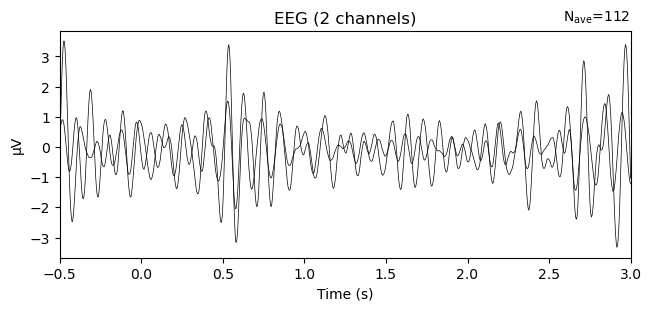

In [ ]:
right_MI.plot(picks = right_electrodes, spatial_colors=False);

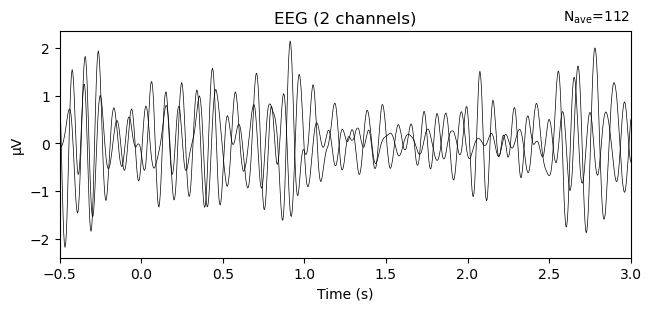

In [ ]:
right_MI.plot(picks = left_electrodes, spatial_colors=False);

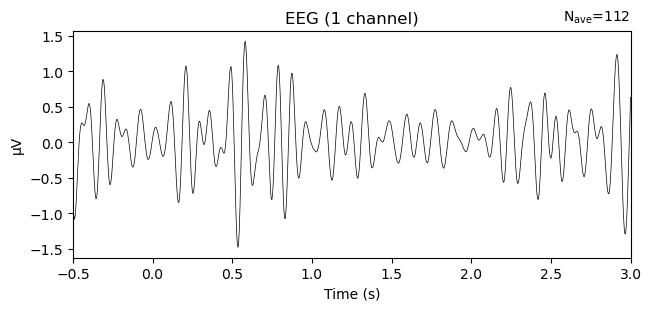

In [ ]:
right_MI.plot(picks = center_electrodes, spatial_colors=False);

#### Left Motor Imagery

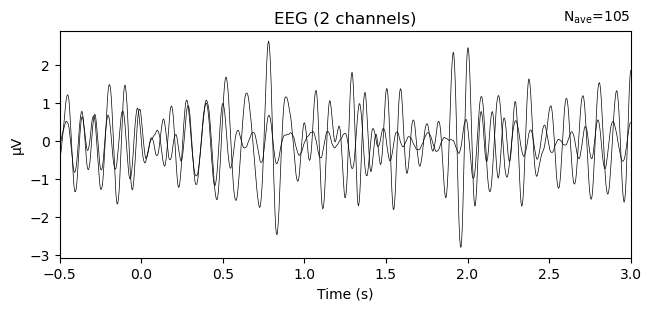

In [ ]:
left_MI.plot(picks = right_electrodes, spatial_colors=False);

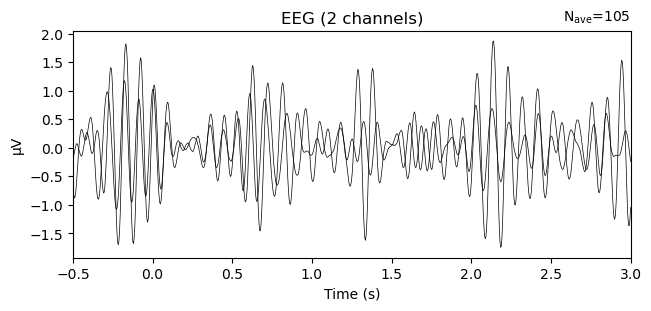

In [ ]:
left_MI.plot(picks = left_electrodes, spatial_colors=False);

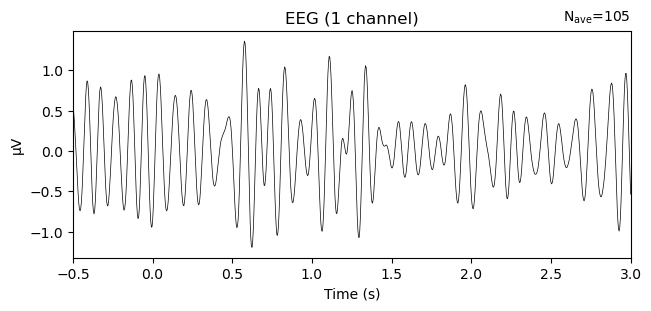

In [ ]:
left_MI.plot(picks = center_electrodes, spatial_colors=False);

### Temporal Topology Map

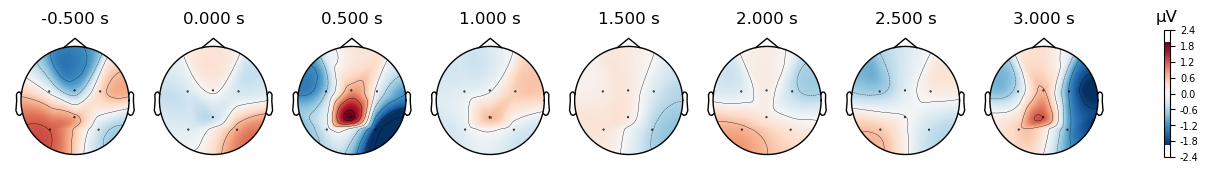

In [ ]:
right_MI.plot_topomap(times = [-0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3]);

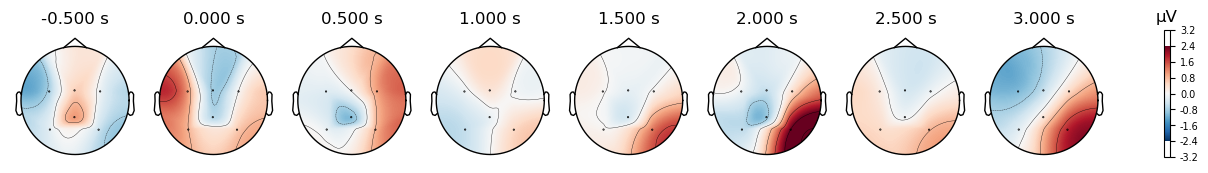

In [ ]:
left_MI.plot_topomap(times = [-0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3]);

### Jointed Plot

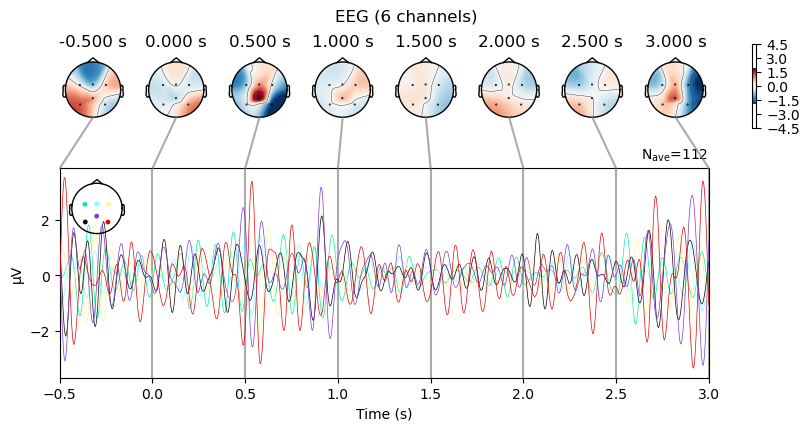

In [ ]:
right_MI.plot_joint([-0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3]);

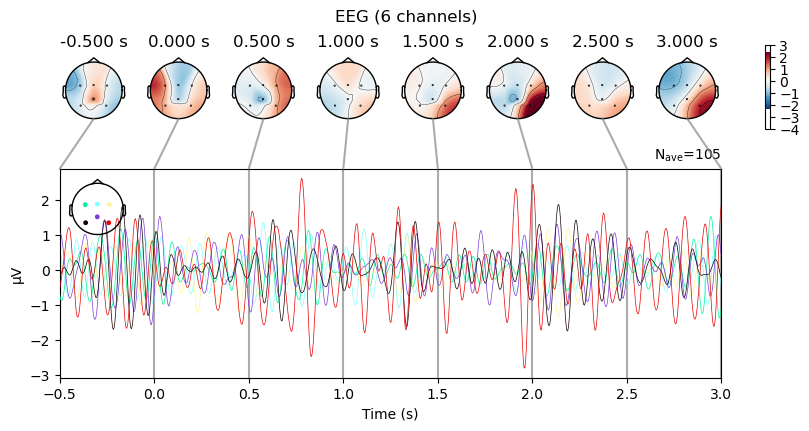

In [ ]:
left_MI.plot_joint([-0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3]);

### Difference Plot

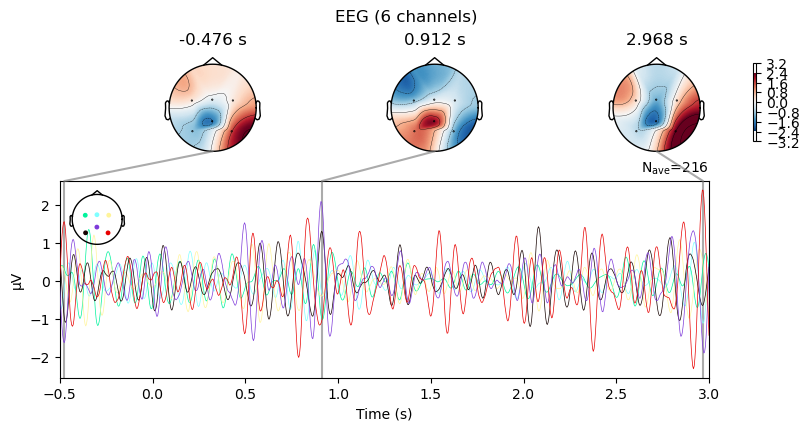

In [ ]:
MI_diff = mne.combine_evoked((right_MI,-left_MI), weights='equal')
MI_diff.plot_joint();

## Time-frequency Domain

In [ ]:
epochs.compute_psd(fmin = 2, fmax = 60).plot();

c:\Users\AbsoluteZeno\anaconda3\Lib\site-packages\mne\viz\utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


# Temporary Section

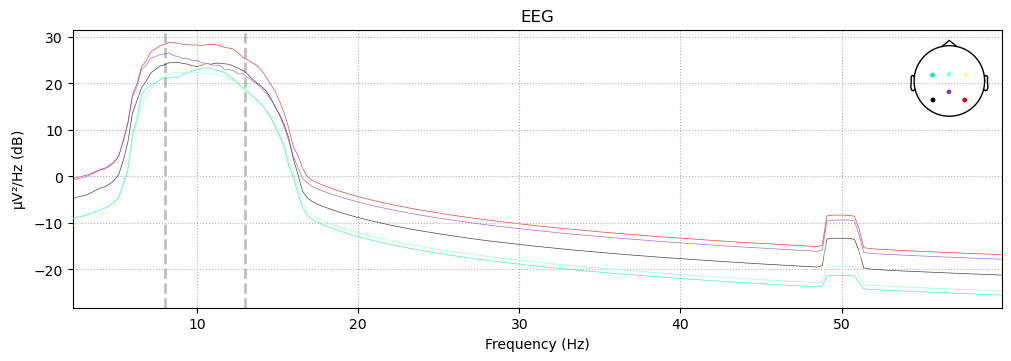

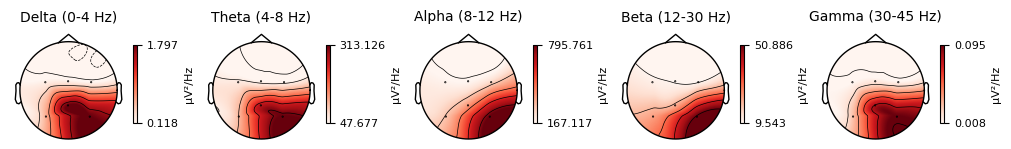

In [ ]:
epochs['right'].compute_psd().plot_topomap();

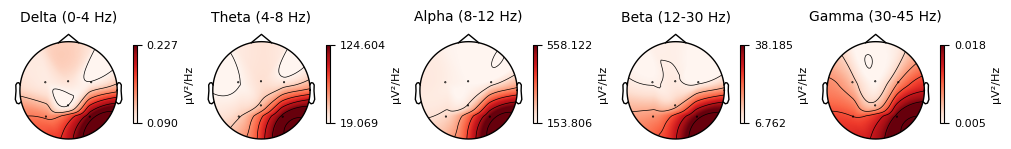

In [ ]:
epochs['left'].compute_psd().plot_topomap();

In [ ]:
import numpy as np
import scipy


class CSP_ORI:
    def __init__(self, n_components=4):
        self.n_components = n_components

    def fit(self, x, y):
        self.classes = np.unique(y)
        n_classes = len(self.classes)
        if n_classes != 2:
            raise ValueError("n_classes must be 2.")

        covs = []
        for this_class in self.classes:
            x_class = x[y == this_class]
            # Convert data dimention to (channels, epoch * data_point)
            _, n_channels, _ = x_class.shape
            x_class = np.transpose(x_class, [1, 0, 2])
            x_class = x_class.reshape(n_channels, -1)
            cov = np.dot(x_class, x_class.T)
            covs.append(cov)

        # Solve generalized eigenvalue problem
        eig_vals, eig_vecs = scipy.linalg.eigh(covs[0],covs[1])
        for i in range(len(eig_vecs)):
            eig_vecs[i] = eig_vecs[i] / np.linalg.norm(eig_vecs[i])

        i = np.argsort(eig_vals)
        ix = np.empty_like(i)
        ix[1::2] = i[: len(i) // 2]
        ix[0::2] = i[len(i) // 2 :][::-1]

        eig_vecs = eig_vecs[:, ix]
        self.filters = eig_vecs.T
        self.patterns = np.linalg.inv(eig_vecs)
        pick_filters = self.filters[: self.n_components]
        x = np.asarray([np.dot(pick_filters, epoch) for epoch in x])
        x = (x**2).mean(axis=2)
        self.mean = x.mean(axis=0)
        self.std = x.std(axis=0)

    def transform(self, x):
        pick_filters = self.filters[: self.n_components]
        x = np.asarray([np.dot(pick_filters, epoch) for epoch in x])
        x = (x**2).mean(axis=2)
        x -= self.mean
        x /= self.std

        return x

    def fit_transform(self, x, y):
        self.fit(x, y)

        return self.transform(x)

In [ ]:
csp = CSP_ORI()
csp.fit(X,Y)

In [ ]:
def cov(x_class):
    _, n_channels, _ = x_class.shape
    x_class = np.transpose(x_class, [1, 0, 2])
    x_class = x_class.reshape(n_channels, -1) # Concat all trials
    return np.dot(x_class, x_class.T)

def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

In [ ]:
df = epochs.to_data_frame()
df

,time,condition,epoch,C3,Cz,C4,PO7,Pz,PO8
0,-0.500,left,0,-0.591759,-0.808519,-0.912811,2.571755,1.595999,-2.497831
1,-0.496,left,0,-1.391804,-0.836286,-0.621913,2.804360,1.832145,-1.456719
2,-0.492,left,0,-2.100141,-0.790325,-0.303014,2.891624,1.936573,-0.425252
3,-0.488,left,0,-2.660726,-0.684440,-0.034128,2.865214,1.962438,0.491194
4,-0.484,left,0,-3.019373,-0.540927,0.151942,2.728746,1.934387,1.244820
...,...,...,...,...,...,...,...,...,...
190087,2.984,right,216,0.822173,-3.046306,4.175605,-9.786899,-14.094888,13.039344
190088,2.988,right,216,-0.820507,-1.306750,1.450104,-4.414903,-5.481044,5.044052
190089,2.992,right,216,-2.131151,0.294231,-1.286101,0.939100,2.973609,-2.689287
190090,2.996,right,216,-3.057135,1.669708,-3.879024,5.995515,10.774193,-9.705073


In [ ]:
df.describe()

,time,epoch,C3,Cz,C4,PO7,Pz,PO8
count,190092.00000,190092.000000,190092.000000,190092.000000,190092.000000,190092.000000,190092.000000,190092.000000
mean,1.25000,108.000000,0.015453,0.030774,-0.045094,0.038135,0.065417,-0.079480
std,1.01152,62.642004,2.106183,2.008001,2.203780,2.755256,3.143338,4.348392
min,-0.50000,0.000000,-18.107401,-13.220653,-13.048962,-26.481194,-47.592838,-40.181531
25%,0.37500,54.000000,-1.080622,-1.162038,-1.266606,-1.491342,-1.401679,-2.444430
50%,1.25000,108.000000,0.014525,0.042156,-0.050559,0.023094,0.058151,-0.083385
75%,2.12500,162.000000,1.119407,1.235955,1.174649,1.604721,1.565769,2.259723
max,3.00000,216.000000,19.630868,11.943478,12.895963,26.615470,42.209334,43.598311


C:\Users\AbsoluteZeno\AppData\Local\Temp\ipykernel_67956\744519546.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['']+alpha)
C:\Users\AbsoluteZeno\AppData\Local\Temp\ipykernel_67956\744519546.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['']+alpha)


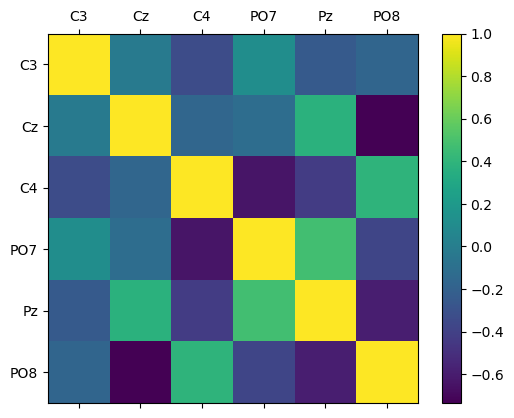

In [ ]:
df_numerical = df[epochs.info['ch_names']]

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(df_numerical.corr(), interpolation='nearest')
fig.colorbar(cax)

alpha = epochs.info['ch_names']
ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)

plt.show()

In [ ]:
x_right = X[Y==0]
np.linalg.eigvals(cov(x_right))

array([1.56268679e-06, 8.48285834e-07, 6.11966891e-08, 1.58512530e-07,
       2.72807277e-07, 3.53874472e-07])

C:\Users\AbsoluteZeno\AppData\Local\Temp\ipykernel_67956\2090067297.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['']+alpha)
C:\Users\AbsoluteZeno\AppData\Local\Temp\ipykernel_67956\2090067297.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['']+alpha)


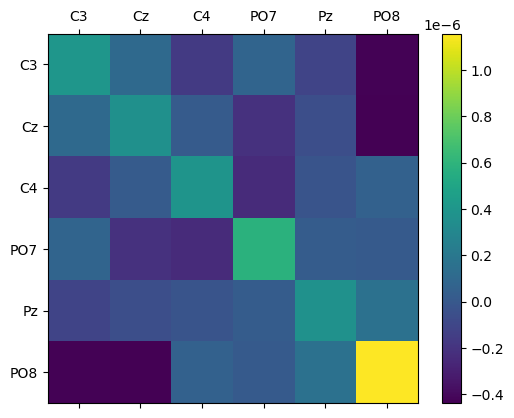

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cov(x_right), interpolation='nearest')
fig.colorbar(cax)

alpha = epochs.info['ch_names']
ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)

plt.show()

In [ ]:
x_left = X[Y==1]
np.linalg.eigvals(cov(x_left))

array([1.26424683e-06, 9.07958305e-07, 5.18075348e-08, 1.46919009e-07,
       2.51303023e-07, 3.20765137e-07])

C:\Users\AbsoluteZeno\AppData\Local\Temp\ipykernel_67956\1886860997.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['']+alpha)
C:\Users\AbsoluteZeno\AppData\Local\Temp\ipykernel_67956\1886860997.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['']+alpha)


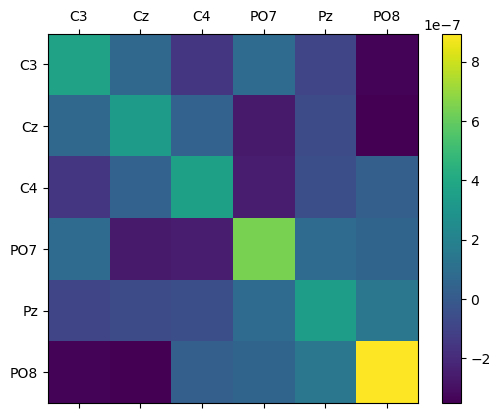

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cov(x_left), interpolation='nearest')
fig.colorbar(cax)

alpha = epochs.info['ch_names']
ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)

plt.show()